In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/Doing/softcomp/rep_rowd/"

import pandas as pd
import glob

MessageError: ignored

In [ ]:
import_path= drive_path + 'word-count-result.csv'
df_all = pd.read_csv(import_path)   # 読み込み先

files = glob.glob(drive_path + "*.csv") # 収集したcsvを全てouterでコンキャットする
for file in files:
    if file == import_path or file == drive_path + "all-words-result.csv" or file == drive_path+"selected_data.csv":
        continue    # 先ほど読み込んだファイルと出力先（テスト実行用）は無視する
    print(file)
    df = pd.read_csv(file)
    df_all = pd.merge(df_all, df,on = "word", how='outer')

df_all = df_all.T   # 転置をとる
df_all.to_csv(drive_path + 'all-words-result.csv')  # 生のデータとして保存する

/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (2).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (3).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (4).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (5).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (6).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (7).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (8).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (9).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (10).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (11).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (12).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (13).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd/word-count-result (14).csv
/content/drive/MyDrive/Doing/softcomp/rep_rowd

特徴量選択

In [ ]:
df_check = pd.read_csv(drive_path + 'all-words-result.csv',header=1)
df_check = df_check.sort_values("word").reset_index(drop=True)  # ソート
df_check

,word,Diaminomaleonitrile,Lewis,Base,Additive,for,PushPull,Electron,Extraction,Efficient,and,Stable,TinBased,Perovskite,Solar,Cells,Tinbased,perovskite,solar,cells,SnPSCs,have,been,attracting,researchers’,attention,as,a,promising,material,fabrication,of,ecofriendly,However,the,power,conversion,efficiency,PCE,stability,...,vib,neutral,oxidized,states,constituent,molecule,Svib,Performance,tertiary,made,Tertiary,heating,cooling,performs,cycle,temperatures,087,NCF87Na,094,NNF94,pastetype,electrodes,50,C,thermallyinduced,cell,discharge,capacity,Q,NCF87,per,unit,mass,constant,connected,external,resistance,reproduced,temperatureand,chargederivatives
0,OS01,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OS02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,2.0,NaN,10.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OS03,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,8.0,NaN,NaN,8.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OS04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,7.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OS05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,7.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TB01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,7.0,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,TB02,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TB03,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,9.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TB04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TB05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,2.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
words = df_check.columns.to_list()

unadoption = []
cnt = 0
for word in words:
    if word == "word":
        continue
    # 出現頻度が3以下の変数を削る
    if len(df_check)- df_check[word].isnull().sum() <= 2:
        cnt += 1
        unadoption.append(word)
for a in unadoption:
    words.remove(a)
print("頻度が2以下で棄却された特徴量の数は",cnt,"残りの変数の数は",len(words))

頻度が3以下で棄却された特徴量の数は 630 残りの変数の数は 119


In [ ]:
general_independence = [ 'on',
 'and',
 'have',
 'been',
 'investigated',
 'for',
 'of',
 'The',
 'in',
 'the',
 'has',
 'from',
 'was',
 'is',
 'with',
 'where',
 'to',
 'indicating',
 'by',
 'because',
 'their',
 'a',
 'that',
 'be',
 'both',
 'under',
 'these',
 'Here',
 'we',
 'an',
 'which',
 'This',
 'We',
 'are',
 'this',
 'found',
 'shows',
 'as',
 'or',
 'based',
 'can',
 'present',
 'using',
 'at',
 'significantly',
 'A',
 'during',
 'below',
 'suggesting',
 'were',
 'data',
 'other',
 'use',
 'In',
 'z',
 'also',
 'well',
 'role',
 'effect',
 'dielectric',
 'between',
 'than',
 'show',
 'By',
 'difference',
 'one',
 'promising',
 'low',
 'into',
 '100',
 'grain',
 'respectively',
 'point',
 'light',
 'revealed',
 'optical',
 'secondary',
 'D',
 'design',
 'focused',
 'DOS',
 'HT',
 'LT',
 'PI',
 'large',
 'observed',
 'strongly',
 'near',
 'state',
 'strategy',
 'single',
 'strong',
 'first',
 'high',
 'type',
 'types',
 'increase',
 'control',
 'enhanced',
 'increases',
 'higher',
 'small',
 'shape',

 'However',
 'efficiency',
 'compared',
 'materials',
 'coefficient',
 'parameter',
 'systematically',
 'dependence',
 'II',
 'number',
 'configuration',
 'x',
 '6',
 'y',
 'region',
 'concentration',
 '1',
 '3',
 'transition',
 'key',
 'ie',
 'could',
 'conjugated',
 'process',
 'steeply',
 'Recently',
 'ratio',
 'understood',
 '10',
 'constituent']
cnt = 0
for gi in general_independence:
    if gi in words:
        cnt += 1
        words.remove(gi)
print("物理に用いる語以外として棄却された特徴量の数は",cnt,"残りの特徴量の数は",len(words))

物理に用いる語以外として棄却された特徴量の数は 0 残りの特徴量の数は 45


In [ ]:
# 欠損値を０で埋めてインデックス番号なしでcsvに出力
df = df_check[words].fillna(0)
df.to_csv(drive_path+"selected_data.csv", index =  False)

# 相対頻度を計算
a = df.sum(axis=1)
for i in range(len(df)):
    for j in range(len(df.columns)):
        if j==0:
            continue
        df.iat[i,j] = df.iat[i,j]/a[i]
# CSVとして保存
df.to_csv(drive_path+"selected_relative_data.csv", index =  False)

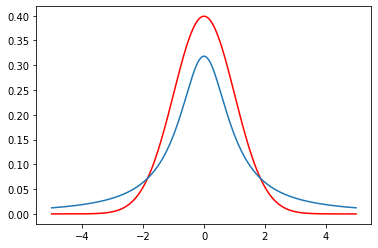